In [1]:
# COMPSCI 4ML3 Q2 - Second Try
# Tahseen Ahmed
# Saturday, February 7th, 2020
# ============================
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression # Use this for MLR

In [2]:
# Solves the Least Squares problem for given X, Y. 
# alpha is the regularization coefficient
# Output is the estimated y for both X and X_all
def solve_ols(X_train, Y_train, X_test, alpha):
    W = np.dot(np.linalg.pinv(np.dot(X_train.T, X_train) + alpha*np.identity(np.shape(X_train)[1])), np.dot(X_train.T, Y_train))
    print ("Optimal W is ", W.flatten())
    return np.dot(X_train, W), np.dot(X_test, W)

In [3]:
def run_ols(X_train, Y_train, X_test, Y_test, alpha, plot_X_train, plot_X_test, description):
    Y_LS_train, Y_LS_test = solve_ols(X_train, Y_train, X_test, alpha)
    
    fig, ax = plt.subplots(figsize=(12,12), dpi=50)
    
    # Plotting the train data
    #ax.plot(X_train, Y_train, 'rx')
    # Plotting the prediction of our model on the train data
    #ax.plot(X_train, Y_LS_train, 'bo')

    # Plotting the actual y values for the test data
    ax.plot(plot_X_test, Y_test, 'rx', label='The actual y values for test data')
    # Plotting the prediction of our model on the test data
    ax.plot(plot_X_test, Y_LS_test, 'bo', label='The predicted y values for test data')
    
    ax.legend(loc='lower right', prop={'size': 20})
    ax.set(xlabel='X', ylabel='Y', title=description)
    ax.grid()
    plt.show()
    
    print ("Mean Squarred Error (MSE) of train data: " , np.square(np.linalg.norm(Y_LS_train-Y_train))/Y_train.size)
    print ("Mean Squarred Error (MSE) of test data: " , np.square(np.linalg.norm(Y_LS_test-Y_test))/Y_test.size)

In [4]:
# generate n data points based on a combination of sinosuidal and polynomial functions
def generate_data(n):
    X = np.random.rand(n, 3)
    Y = 2 + (2*X[0]) + (3*X[1]) + (4*X[2]) + (3 *X[0] * X[1]) - (5 * X[1] * X[2]) + (2 * X[0]**2 * X[2]**2)
    # Adding noise
    Y = Y + 0.1*np.random.randn(n,1)
    return X, Y

Optimal W is  [-1.69780434e-03 -1.69780434e-03 -1.69780434e-03  3.81557732e-03
  3.81557732e-03  3.81557732e-03  3.67768209e-03  3.67768209e-03
  3.67768209e-03  8.59474566e+00  6.13398251e+00  6.13611568e+00]


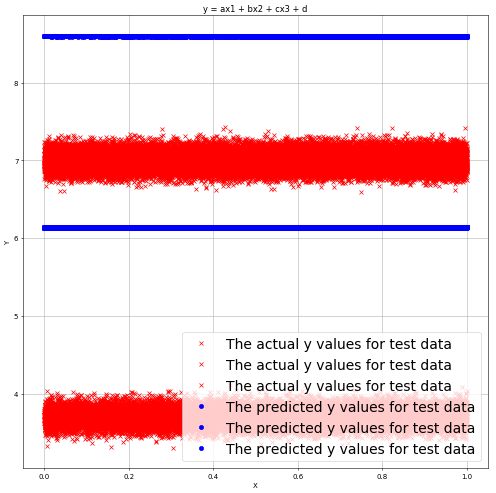

Mean Squarred Error (MSE) of train data:  0.010061582409160155
Mean Squarred Error (MSE) of test data:  3.078035341381224


    SciKit Learn Linear Model


[[-0.0016978   0.00381558  0.00367768]
 [-0.0016978   0.00381558  0.00367768]
 [-0.0016978   0.00381558  0.00367768]] 6.954947950300704


In [5]:
# Number of training and test points.
n_train = 25000
n_test  = 25000

# This will be used later for regularization. For now it is set to 0.
alpha = 0

# Generating train and test data.
X_train, Y_train = generate_data(n_train)
X_test, Y_test = generate_data(n_test)

# Three-dimensional hyperplane (y = ax1 + bx2 + cx3 + d)
# Data Augmentation:
X_augmented_train = np.concatenate((X_train,np.ones((n_train, 1))), axis=1)
X_augmented_test = np.concatenate((X_test,np.ones((n_test, 1))), axis=1)

# Now we run OLS on the augmented data.
run_ols(X_augmented_train, Y_train, X_augmented_test, Y_test, alpha, X_train, X_test, "y = ax1 + bx2 + cx3 + d")

print('\n')
print ("=====================================")
print ("    SciKit Learn Linear Model")
print ("=====================================")
print('\n')
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

# display coefficients, not sure about intercept, so I take the mean of the matrix.
print(regressor.coef_, regressor.intercept_.mean())
